# Risk Management

## Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv("bankData.csv")
data.set_index('Date', inplace=True)

In [78]:
data.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-03,482.700012,55.900002,104.949997,39.150002
2005-01-04,478.600006,55.299999,104.269997,38.410000
2005-01-05,484.600006,54.980000,103.800003,38.490002
2005-01-06,489.299988,56.279999,105.230003,38.709999


In [88]:
# weights (assuming equal weighting for each bank)
weights = [1/(len(data.columns))] * (len(data.columns))

In [89]:
print(weights)

[0.25, 0.25, 0.25, 0.25]


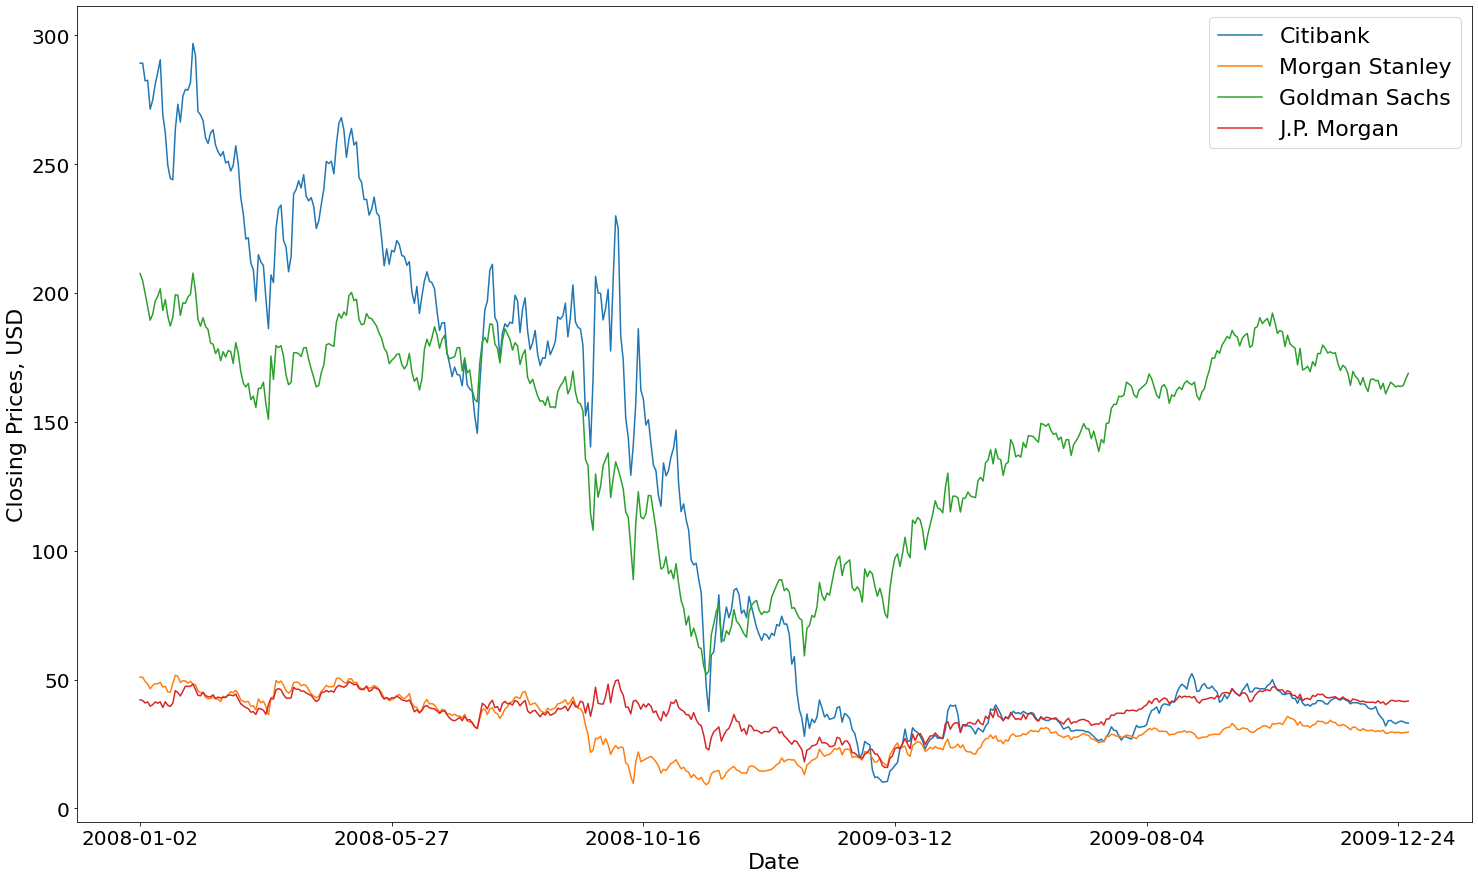

In [94]:
asset_prices = data.loc['2008-01-01':'2009-12-31']

plt.rcParams.update({'font.size': 22}) 
asset_prices.plot(figsize=(25,15), fontsize=20).set_ylabel("Closing Prices, USD")

plt.show()

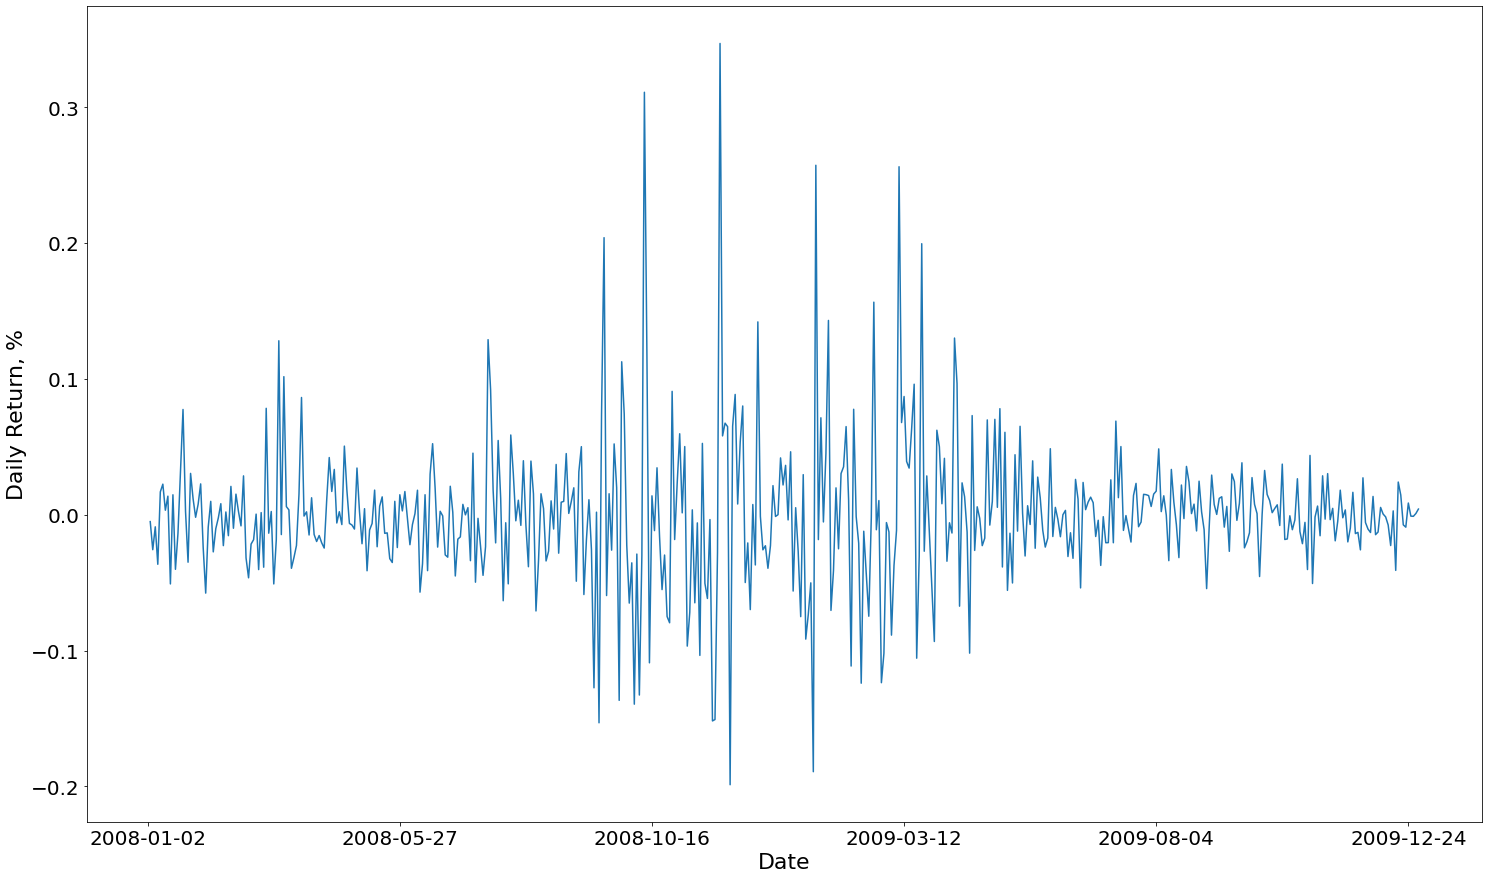

In [95]:
# Portfolio daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns
portfolio_returns.plot(figsize=(25,15), fontsize=20).set_ylabel("Daily Return, %")
plt.show()

In [96]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
print(covariance)

                Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        1.475195        0.821707       0.573790     0.724639
Morgan Stanley  0.821707        1.298341       0.658895     0.560523
Goldman Sachs   0.573790        0.658895       0.500807     0.426979
J.P. Morgan     0.724639        0.560523       0.426979     0.685584
